11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


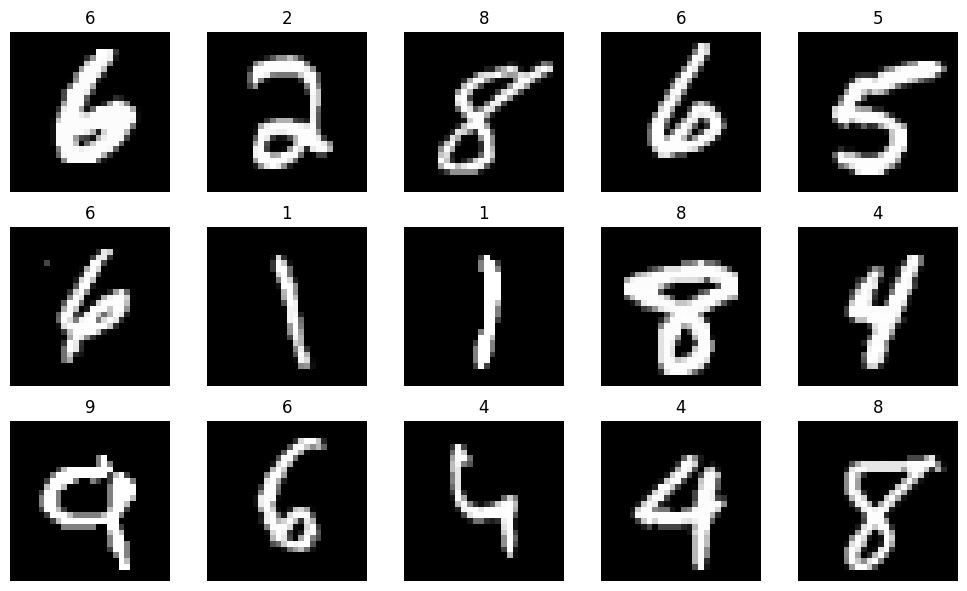

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

# Cargar el dataset MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Mostrar 15 ejemplos aleatorios
r, c = 3, 5
fig = plt.figure(figsize=(2*c, 2*r))
for _r in range(r):
    for _c in range(c):
        ix = np.random.randint(0, len(X_train))
        img = X_train[ix]
        plt.subplot(r, c, _r*c + _c + 1)
        plt.imshow(img, cmap='gray')
        plt.axis("off")
        plt.title(y_train[ix])
plt.tight_layout()
plt.show()


In [ ]:
from ctypes import sizeof
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from keras.datasets import mnist




(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train_reduced = X_train[:5000]
y_train_reduced = y_train[:5000]
X_test = X_test[:2500]
y_test = y_test[:2500]

X_train_reduced = X_train_reduced.reshape((X_train_reduced.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0],-1))


pipe1 = make_pipeline(Normalizer(norm="max"),StandardScaler(), LogisticRegression(solver='liblinear'))

pipe1.fit(X_train_reduced, y_train_reduced)



11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Pipeline(steps=[('normalizer', Normalizer(norm='max')),
                ('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(solver='liblinear'))])

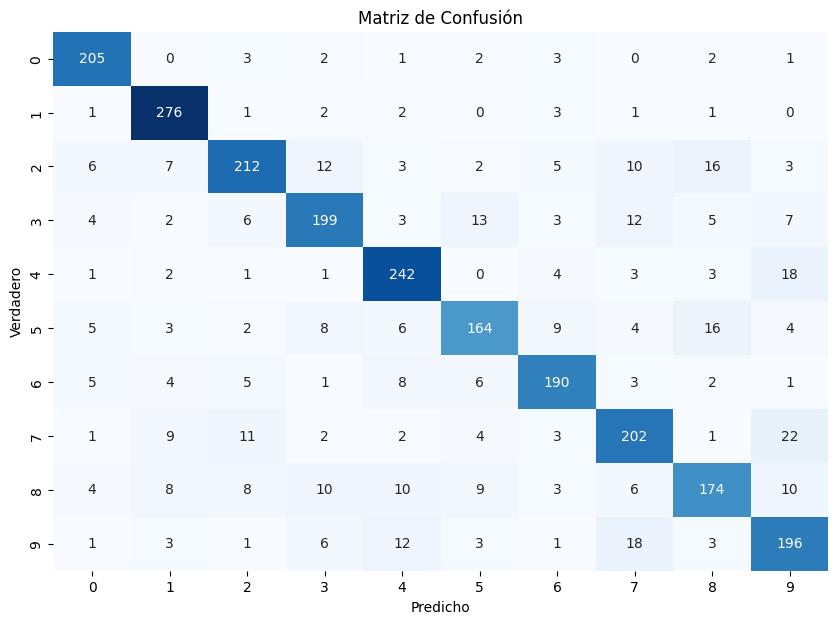

0.824
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       219
           1       0.88      0.96      0.92       287
           2       0.85      0.77      0.81       276
           3       0.82      0.78      0.80       254
           4       0.84      0.88      0.86       275
           5       0.81      0.74      0.77       221
           6       0.85      0.84      0.85       225
           7       0.78      0.79      0.78       257
           8       0.78      0.72      0.75       242
           9       0.75      0.80      0.77       244

    accuracy                           0.82      2500
   macro avg       0.82      0.82      0.82      2500
weighted avg       0.82      0.82      0.82      2500



In [ ]:
y_pred = pipe1.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
reporte = classification_report(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))

import seaborn as sns
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicho')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión')
plt.show()

print(accuracy)
print(reporte)




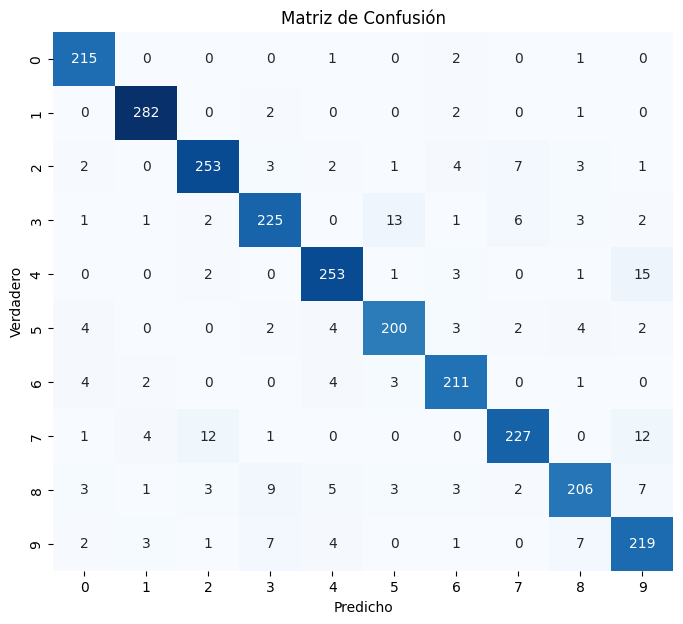

0.9164
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       219
           1       0.96      0.98      0.97       287
           2       0.93      0.92      0.92       276
           3       0.90      0.89      0.89       254
           4       0.93      0.92      0.92       275
           5       0.90      0.90      0.90       221
           6       0.92      0.94      0.93       225
           7       0.93      0.88      0.91       257
           8       0.91      0.85      0.88       242
           9       0.85      0.90      0.87       244

    accuracy                           0.92      2500
   macro avg       0.92      0.92      0.92      2500
weighted avg       0.92      0.92      0.92      2500



In [ ]:
from sklearn.ensemble import RandomForestClassifier

pipe_rf = make_pipeline(
    Normalizer(norm="max"),
    StandardScaler(),
    RandomForestClassifier(n_estimators=100, random_state=42)
)

pipe_rf.fit(X_train_reduced, y_train_reduced)
y_pred_rf = pipe_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)
confusion = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 7))

import seaborn as sns
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicho')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión')
plt.show()
print(accuracy_rf)
print(class_report_rf)

In [ ]:
from sklearn.svm import SVC
pipe_svm = make_pipeline(
    Normalizer(norm="max"),
    StandardScaler(),
    SVC(kernel='linear')
)

pipe_svm.fit(X_train_reduced, y_train_reduced)
y_pred_svm = pipe_svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
class_report_svm = classification_report(y_test, y_pred_svm)
print(accuracy_svm)
print(class_report_svm)


0.882
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       219
           1       0.93      0.98      0.95       287
           2       0.88      0.89      0.89       276
           3       0.86      0.87      0.86       254
           4       0.91      0.92      0.92       275
           5       0.83      0.86      0.84       221
           6       0.93      0.88      0.91       225
           7       0.84      0.83      0.84       257
           8       0.88      0.76      0.82       242
           9       0.83      0.85      0.84       244

    accuracy                           0.88      2500
   macro avg       0.88      0.88      0.88      2500
weighted avg       0.88      0.88      0.88      2500



Anotaciones sobre presentación ejercicio 2:


---


Comparar entre Random Forest y Máquina de Soporte Vectorial puede ser interesante para la presentación.
